# Capital One Code Challenge Data Science

This coding challenge is designed to test your skill and intuition about real world data. For the challenge, we will use data collected by the New York City Taxi and Limousine commission about “Green” Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from September 2015. We are using NYC Taxi and Limousine trip record data: (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml).

# Harish Babu Umapathy
# 02/08/2019
# Workday ID:C946201

# Load required Python Modules

In [3]:
##Import all Necessary Python Modules
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate,train_test_split
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
from sklearn import datasets, linear_model
from tabulate import tabulate ##Execute ! pip install tabulate to load for first time
import scipy.stats as stats
import statistics
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
## Execute the below statement for installing the module for the first time
#! pip install tabulate

# Question 1
### a. Programmatically download and load into your favorite analytical tool the trip data for September 2015.

In [5]:
##Place the data file in the same folder where the notebook is present
nyc_trip = pd.read_csv("green_tripdata_2015-09.csv",engine='python')
nyc_trip.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [6]:
##Check for all column features using describe
nyc_trip.describe(include='all')

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1494926,1494926,1494926,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,...,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
unique,NaN,1079075,1077210,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-09-20 02:00:32,2015-09-28 00:00:00,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9,172,1486192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.782045e+00,NaN,NaN,NaN,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,...,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,NaN,NaN,NaN,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,...,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,NaN,NaN,NaN,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,...,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,NaN,NaN,NaN,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,...,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,NaN,NaN,NaN,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,...,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,NaN,NaN,NaN,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,...,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00


In [7]:
nyc_trip.info() # data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

### b.Report how many rows and columns of data you have loaded.**

In [8]:
print("Number of rows:", nyc_trip.shape[0])
print("Number of columns:", nyc_trip.shape[1])

Number of rows: 1494926
Number of columns: 21


# Question 2
### a.Plot a histogram of the number of the trip distance (“Trip Distance”).**

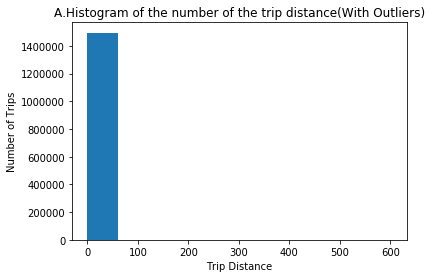

In [9]:
##Histogram of the number of trip distance.
plt.hist(nyc_trip['Trip_distance'])
plt.title('A.Histogram of the number of the trip distance(With Outliers)')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.show()

#### Looks like the histogram is just one tall bar.This might be some outliers in the Trip distance.Lets check for any outliers in the data and plot the histogram without outliers

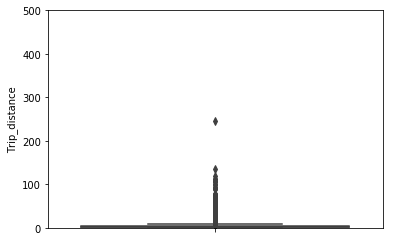

In [10]:
##Outlier detection using boxplots
plt.ylim(0,500)
ax = sns.boxplot(y="Trip_distance", data=nyc_trip)

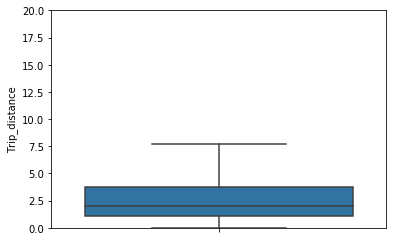

In [11]:
##set showflier=False.This removes any outlier outside the whiskers
plt.ylim(0,20)
ax = sns.boxplot(y="Trip_distance",showfliers=False, data=nyc_trip)

#### Looks like higher frequency of trips were between 0 to 10 miles.Lets plot histogram with only trip distance between 0 to 10 miles

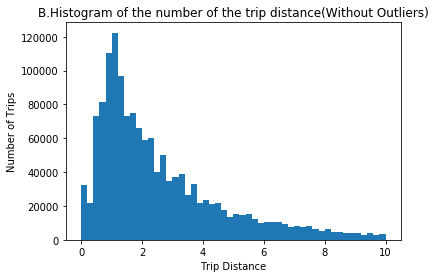

In [12]:
## Histogram with trip distance between 0 to 10 miles.
plt.hist(nyc_trip['Trip_distance'][nyc_trip['Trip_distance']<=10],bins = 50)
plt.title('B.Histogram of the number of the trip distance(Without Outliers)')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.show()

**b.Report any structure you find and any hypotheses you have about that structure.**

#### Shape of the above histograms: Skewed right.
#### The histogram A is just one tall bar, whereas the histogram B is skewed right, with a tail going off to the right. You can see on the right side there are only a small amount of trips when compared to the trips on the left side. Most of the trips were within the 0-5 mile range. A few trips were within the 5-10 mile range and very less were above 10 miles.
#### The hypothesis: The Trip Distance is asymmetrically distributed and they are not random. If there were random, we would have a (symmetric) Gaussian distribution.

# Question 3
### a.Report mean and median trip distance grouped by hour of day.

In [13]:
## We are creating a new field pickup_hour by extracting the hour from lpep_pickup_datetime field
nyc_trip['pickup'] = nyc_trip['lpep_pickup_datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
nyc_trip['pickup_hour'] = nyc_trip['pickup'].apply(lambda x: x.hour) 
# we're stripping the hour field from the dropoff_datetime field to create a new field named "dropoff_hour"
nyc_trip['dropoff'] = nyc_trip['Lpep_dropoff_datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
nyc_trip['dropoff_hour'] = nyc_trip['dropoff'].apply(lambda x: x.hour)# this is a new field for holding the dropoff_hour.

In [14]:
## Extract the day of the week and convert pickup and dropoff field to datetime
nyc_trip['lpep_pickup_datetime'] = pd.to_datetime(nyc_trip.lpep_pickup_datetime)
nyc_trip['Lpep_dropoff_datetime'] = pd.to_datetime(nyc_trip.Lpep_dropoff_datetime)# convert pickup_datetime to datetime object
nyc_trip.loc[:, 'day_of_week'] = nyc_trip['lpep_pickup_datetime'].dt.dayofweek # extract the day of week from pickup_date

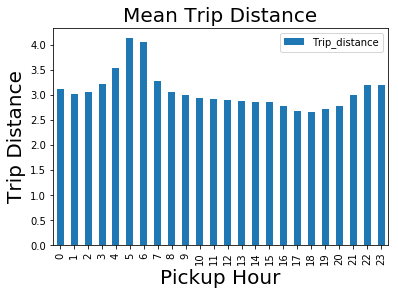

In [15]:
## Mean Trip distance grouped by hour of day
nyc_trip[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean Trip Distance', fontsize = 20)
plt.xlabel('Pickup Hour', fontsize = 20)
plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

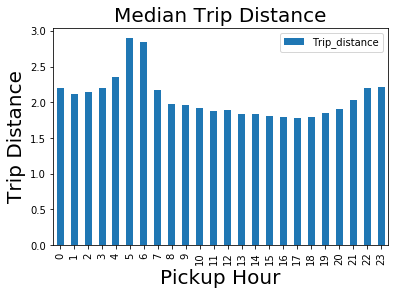

In [16]:
## Median Trip distance grouped by hour of day
nyc_trip[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median Trip Distance', fontsize = 20)
plt.xlabel('Pickup Hour', fontsize = 20)
plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

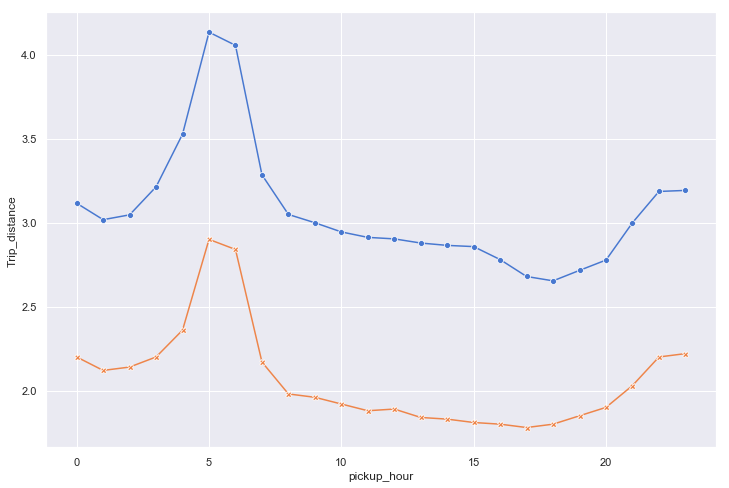

In [17]:
## Comparison of Mean and Median trip distance grouped by hour of a day
## Mean trip distance marked by 'o' and Median trip distance marked by 'X'
Median_nyc_trip=pd.DataFrame(nyc_trip[['Trip_distance','pickup_hour']].groupby('pickup_hour',as_index=False).median())
Mean_nyc_trip=pd.DataFrame(nyc_trip[['Trip_distance','pickup_hour']].groupby('pickup_hour',as_index=False).mean())
sns.set(palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
sns.lineplot(x="pickup_hour", y="Trip_distance", data=Mean_nyc_trip,marker='o')
sns.lineplot(x="pickup_hour", y="Trip_distance", data=Median_nyc_trip,marker='X')

#### From the above plot, it is clear that the trip distance was high during early morning(4 to 7 am) and surges throughout the day and increases again during midnight

### b. We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.**

#### Reading through the Data dictionary, the variable RateCodeID contains values indicating the final rate that was applied. Among those values, I realized that there is Newark(RateCodeID 3) and JFK(RateCodeID 2) which are the major airports in New York. Also,Nassau or Westchester airport has the RateCodeID as 4

In [18]:
# Filter airport trips
airports_trips = nyc_trip[(nyc_trip.RateCodeID==2) | (nyc_trip.RateCodeID==3) | (nyc_trip.RateCodeID==4)]

In [19]:
print ("Number of trips to/from NYC airports: ", airports_trips[(airports_trips.RateCodeID==2)].shape[0])
print ("Average fare (calculated by the meter) of trips to/from NYC airports: $", airports_trips[(airports_trips.RateCodeID==2)].Fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from NYC airports: $", airports_trips[(airports_trips.RateCodeID==2)].Total_amount.mean(),"per trip")

Number of trips to/from NYC airports:  4435
Average fare (calculated by the meter) of trips to/from NYC airports: $ 49.021871476888386 per trip
Average total charged amount (before tip) of trips to/from NYC airports: $ 56.53170913190322 per trip


In [20]:
print ("Number of trips to/from Newark airport: ", airports_trips[(airports_trips.RateCodeID==3)].shape[0])
print ("Average fare (calculated by the meter) of trips to/from Newark airports: $", airports_trips[(airports_trips.RateCodeID==3)].Fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from Newark airports: $", airports_trips[(airports_trips.RateCodeID==3)].Total_amount.mean(),"per trip")

Number of trips to/from Newark airport:  1117
Average fare (calculated by the meter) of trips to/from Newark airports: $ 48.79856759176365 per trip
Average total charged amount (before tip) of trips to/from Newark airports: $ 59.89527305282089 per trip


In [21]:
print ("Number of trips to/from Nassau or Westchester airport: ", airports_trips[(airports_trips.RateCodeID==4)].shape[0])
print ("Average fare (calculated by the meter) of trips to/from Nassau or Westchester airports: $", airports_trips[(airports_trips.RateCodeID==4)].Fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from Nassau or Westchester airports: $", airports_trips[(airports_trips.RateCodeID==4)].Total_amount.mean(),"per trip")

Number of trips to/from Nassau or Westchester airport:  925
Average fare (calculated by the meter) of trips to/from Nassau or Westchester airports: $ 60.16488648648648 per trip
Average total charged amount (before tip) of trips to/from Nassau or Westchester airports: $ 68.76732972973045 per trip


#### Alternative approach is to get the co-ordinates of each airport and find the absolute difference between Pickup and Dropoff Latitude and Longitude.Threshold of 0.01 is taken for both Latidude and Longitude

In [22]:
##Get the Location details of JFK airport from Google
JFK_Longitude=-73.7822222222
JFK_Latitude=40.6441666667
nyc_trip['Pickup_Long_Diff'] = abs(nyc_trip['Pickup_longitude']-JFK_Longitude)
nyc_trip['Dropoff_long_Diff'] = abs(nyc_trip['Dropoff_longitude']-JFK_Longitude)
nyc_trip['Pickup_Lat_Diff'] = abs(nyc_trip['Pickup_latitude']-JFK_Latitude)
nyc_trip['Dropof_Lat_Diff'] = abs(nyc_trip['Dropoff_latitude']-JFK_Latitude)
JFK_Trip=nyc_trip[((nyc_trip['Pickup_Long_Diff']<=0.01) & (nyc_trip['Pickup_Lat_Diff']<=0.01)) | ((nyc_trip['Pickup_Lat_Diff']<=0.01) & (nyc_trip['Dropof_Lat_Diff']<=0.01))].assign(Airport='JFK')
print ("Number of trips to/from NYC airports: ", JFK_Trip.shape[0])
print ("Average fare (calculated by the meter) of trips to/from NYC airports: $", JFK_Trip.Fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from NYC airports: $", JFK_Trip.Total_amount.mean(),"per trip")

Number of trips to/from NYC airports:  4579
Average fare (calculated by the meter) of trips to/from NYC airports: $ 13.229076217514745 per trip
Average total charged amount (before tip) of trips to/from NYC airports: $ 15.734832932955678 per trip


In [23]:
##Get the Location details of LGA airport from Google
LGA_Longitude=-73.87396590000003
LGA_Latitude=40.7769271
nyc_trip['Pickup_Long_Diff'] = abs(nyc_trip['Pickup_longitude']-LGA_Longitude)
nyc_trip['Dropoff_long_Diff'] = abs(nyc_trip['Dropoff_longitude']-LGA_Longitude)
nyc_trip['Pickup_Lat_Diff'] = abs(nyc_trip['Pickup_latitude']-LGA_Latitude)
nyc_trip['Dropof_Lat_Diff'] = abs(nyc_trip['Dropoff_latitude']-LGA_Latitude)
LGA_Trip=nyc_trip[((nyc_trip['Pickup_Long_Diff']<=0.01) & (nyc_trip['Pickup_Lat_Diff']<=0.01)) | ((nyc_trip['Pickup_Lat_Diff']<=0.01) & (nyc_trip['Dropof_Lat_Diff']<=0.01))].assign(Airport='LGA')
print ("Number of trips to/from LGA airports: ", LGA_Trip.shape[0])
print ("Average fare (calculated by the meter) of trips to/from LGA airports: $", LGA_Trip.Fare_amount.mean(),"per trip")
print ("Average total charged amount (before tip) of trips to/from LGA airports: $", LGA_Trip.Total_amount.mean(),"per trip")

Number of trips to/from LGA airports:  20767
Average fare (calculated by the meter) of trips to/from LGA airports: $ 8.75829200173352 per trip
Average total charged amount (before tip) of trips to/from LGA airports: $ 11.055446140508831 per trip


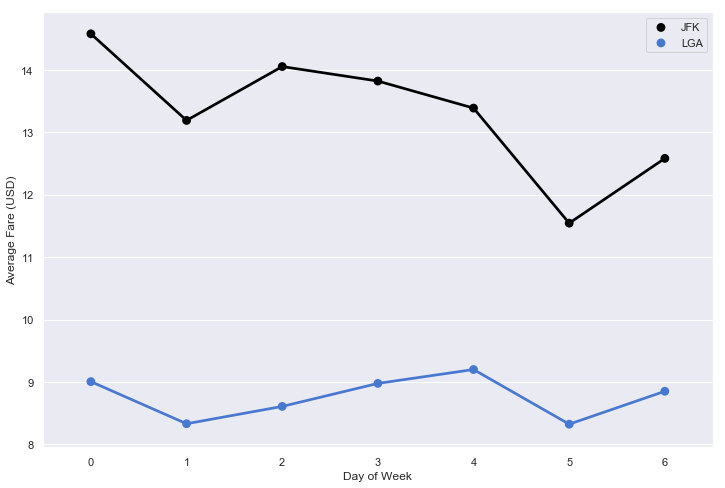

In [24]:
# Plot to identify the average fare across the week.
grouped_jfk = JFK_Trip.groupby(['day_of_week', 'Airport'])['Fare_amount'].aggregate(np.mean).reset_index()
grouped_lga = LGA_Trip.groupby(['day_of_week', 'Airport'])['Fare_amount'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_jfk.day_of_week.values, grouped_jfk.Fare_amount.values, grouped_jfk.Airport.values, alpha=0.8,palette=sns.color_palette(["#000000"]))
sns.pointplot(grouped_lga.day_of_week.values, grouped_lga.Fare_amount.values, grouped_lga.Airport.values, alpha=0.8)
plt.ylabel('Average Fare (USD)')
plt.xlabel('Day of Week')
plt.xticks(rotation='horizontal')
plt.show()

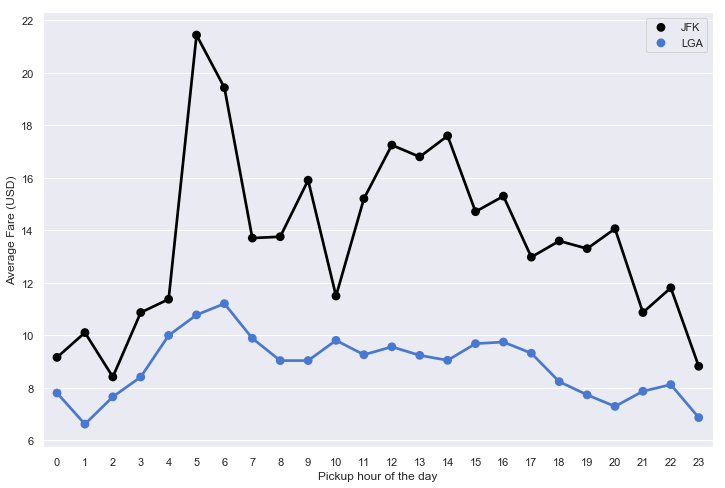

In [25]:
# Plot to identify the average fare across day.
grouped_jfk = JFK_Trip.groupby(['pickup_hour', 'Airport'])['Fare_amount'].aggregate(np.mean).reset_index()
grouped_lga = LGA_Trip.groupby(['pickup_hour', 'Airport'])['Fare_amount'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_jfk.pickup_hour.values, grouped_jfk.Fare_amount.values, grouped_jfk.Airport.values, alpha=0.8,palette=sns.color_palette(["#000000"]))
sns.pointplot(grouped_lga.pickup_hour.values, grouped_lga.Fare_amount.values, grouped_lga.Airport.values, alpha=0.8)
plt.ylabel('Average Fare (USD)')
plt.xlabel('Pickup hour of the day')
plt.xticks(rotation='horizontal')
plt.show()


#### Its clear from the above pointplots that the trips to/from JFK have almost 2x the average fare of that of LGA. Also, on day 0, that is Sunday the average fare is higher than all the weekdays. It looks like the average fare surged in the afternoon, and plummeted by a huge margin later in the day.
#### For both JFK and LGA airport,Early morning rides costs more than other hours of the day.Seems like people are rushing to office in early morning

## Question 4
### a. Build a derived variable for tip as a percentage of the total fare.

In [26]:
nyc_trip['tip_percent'] = nyc_trip['Tip_amount']/nyc_trip['Total_amount'] # calculate tip percentage 
nyc_trip['tip_percent'] = nyc_trip['tip_percent'].apply(lambda x: x * 100) # multiply by 100 to get the %
nyc_trip['tip_percent'].head()

0    20.00000
1     0.00000
2     8.62069
3     0.00000
4     0.00000
Name: tip_percent, dtype: float64

C:\Users\haris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


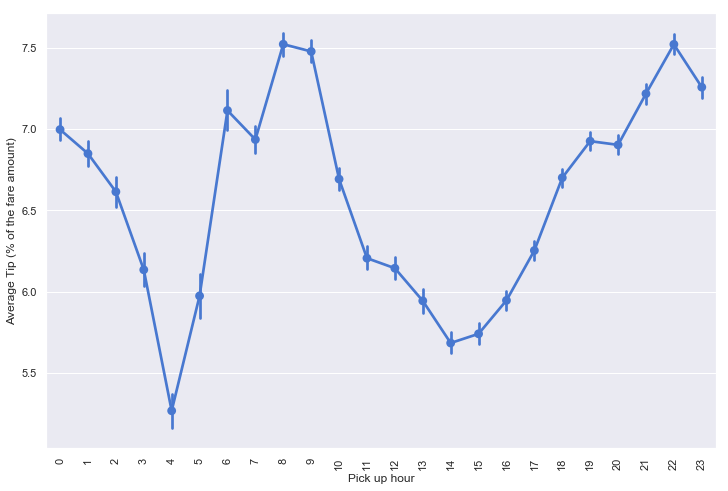

In [27]:
plt.figure(figsize=(12,8))
ax = sns.pointplot(x="pickup_hour", y="tip_percent", data=nyc_trip)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()

#### b.Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.

In [28]:
## Install and Import Lightgbm,XGBoost
! pip install lightgbm
! pip install xgboost
import xgboost as xgb # please install xgboost before running this script.
import lightgbm as lgb # please install lightgbm before running this script.

In [29]:
# load the data into a new pandas dataframe.
nyc_model =nyc_trip
nyc_model = nyc_model.reset_index() # reset the index of our dataframe. 
nyc_model.head()

,index,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,pickup,pickup_hour,dropoff,dropoff_hour,day_of_week,Pickup_Long_Diff,Dropoff_long_Diff,Pickup_Lat_Diff,Dropof_Lat_Diff,tip_percent
0,0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,...,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,1,0.105519,0.105465,0.091972,0.091907,20.00000
1,1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,...,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,1,0.136830,0.136814,0.135289,0.135285,0.00000
2,2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,...,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0,1,0.047444,0.040448,0.010219,0.012241,8.62069
3,3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,...,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0,1,0.047421,0.057461,0.010249,0.005344,0.00000
4,4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,...,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0,1,0.081517,0.070446,0.062881,0.062198,0.00000


In [30]:
## Based on data dictionary,it is clear that the field is automatically populated for credit card tips.Cash tips are not included.
## Exclude the cash payment type and also any tip amount less than 0
nyc_model['tip_percent'] = nyc_model['Tip_amount']/nyc_model['Total_amount'] # calculate the tip percent
nyc_model['tip_percent'] = nyc_model['tip_percent'].apply(lambda x: x * 100) # multiply the value by 100
nyc_model = nyc_model[nyc_model['Tip_amount'] > 0] # make sure the tip is greater than zero
nyc_model.shape

(602732, 32)

In [31]:
##Excluded the cash payment type
nyc_model=nyc_model[nyc_model['Payment_type'] !=2]
nyc_model.shape

(602730, 32)

In [32]:
nyc_model['pickup_day'] = nyc_model['lpep_pickup_datetime'].dt.day
nyc_model['pickup_month'] = nyc_model['lpep_pickup_datetime'].dt.month
nyc_model['pickup_hour'] = nyc_model['lpep_pickup_datetime'].dt.hour
nyc_model["week_of_year"] = nyc_model["lpep_pickup_datetime"].dt.weekofyear
nyc_model["day_of_week"] = nyc_model["lpep_pickup_datetime"].dt.weekday
# Convert to numeric 
map_dict = {'N':0, 'Y':1}
nyc_model['Store_and_fwd_flag'] = nyc_model['Store_and_fwd_flag'].map(map_dict)
nyc_model.head()

,index,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,...,dropoff_hour,day_of_week,Pickup_Long_Diff,Dropoff_long_Diff,Pickup_Lat_Diff,Dropof_Lat_Diff,tip_percent,pickup_day,pickup_month,week_of_year
0,0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,0,5,-73.979485,40.684956,-73.979431,40.685020,...,0,1,0.105519,0.105465,0.091972,0.091907,20.000000,1,9,36
2,2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,0,1,-73.921410,40.766708,-73.914413,40.764687,...,0,1,0.047444,0.040448,0.010219,0.012241,8.620690,1,9,36
5,5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,0,1,-73.945297,40.808186,-73.937668,40.821198,...,0,1,0.071331,0.063702,0.031258,0.044270,16.666667,1,9,36
8,8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,0,1,-73.963150,40.693829,-73.956787,40.680531,...,0,1,0.089184,0.082821,0.083099,0.096397,16.666667,1,9,36
11,11,2,2015-09-01 00:04:00,2015-09-01 00:06:06,0,1,-73.905540,40.772526,-73.895363,40.768963,...,0,1,0.031575,0.021397,0.004401,0.007964,16.666667,1,9,36


In [33]:
nyc_model.columns

Index(['index', 'VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'pickup', 'pickup_hour',
       'dropoff', 'dropoff_hour', 'day_of_week', 'Pickup_Long_Diff',
       'Dropoff_long_Diff', 'Pickup_Lat_Diff', 'Dropof_Lat_Diff',
       'tip_percent', 'pickup_day', 'pickup_month', 'week_of_year'],
      dtype='object')

In [34]:
##Drop unwanted columns and Check for any null values in the dataframe
nyc_model.drop(['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Ehail_fee','pickup', 
       'dropoff', 'dropoff_hour',  'Pickup_Long_Diff',
       'Dropoff_long_Diff', 'Pickup_Lat_Diff', 'Dropof_Lat_Diff'], axis=1, inplace=True)
nyc_model.isnull().values.any()

False

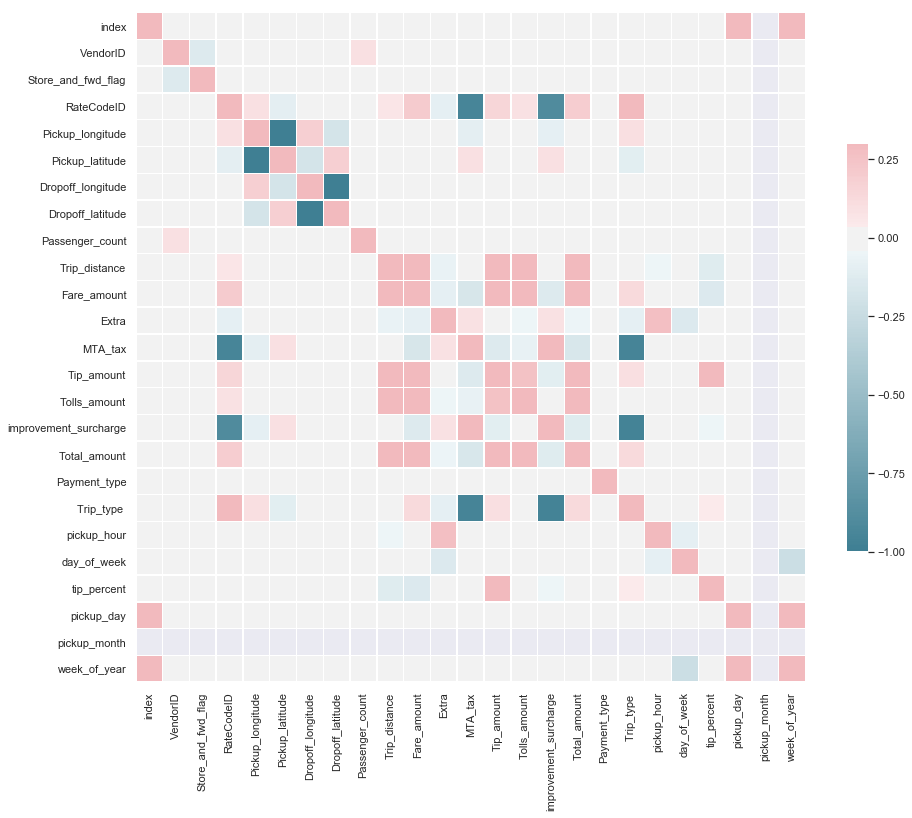

In [35]:
##Correlation Analysis using Heatmap
corr=nyc_model.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Variables like total_amount, tolls_amount, trip_type etc are of very high importance and are all related to other variables.

#### Variables like payment_type, trip_distance, pickup_longitude etc are of very less importance and are not at all related to other variables.

#### Total_amount is very important => correlation is as high as 0.8

#### Strong correlation is observed between different IDVs but we will be using tree based model so no need to remove those variables which are highly correlated. (though try removing for Robustness of model) - Tip_percent is slight correated with many IDVs.

### Train-Test Split

In [36]:
X, y = nyc_model, nyc_model.tip_percent
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4) # test size = 0.4, hence 60-40 split.
X_test.head()

,index,VendorID,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_hour,day_of_week,tip_percent,pickup_day,pickup_month,week_of_year
1034390,1034390,2,0,1,-73.954140,40.790112,-73.954781,40.783741,5,0.57,...,0.3,6.36,1,1.0,9,0,16.666667,21,9,39
49099,49099,2,0,1,-73.920670,40.756901,-73.896423,40.772861,1,2.03,...,0.3,12.96,1,1.0,8,2,16.666667,2,9,36
337325,337325,2,0,1,-73.924828,40.684662,-73.924843,40.684685,1,0.00,...,0.3,38.80,1,1.0,22,0,90.206186,7,9,37
1066418,1066418,2,0,1,-73.956993,40.801777,-73.942192,40.809750,1,1.94,...,0.3,12.36,1,1.0,0,1,16.666667,22,9,39
244990,244990,2,0,1,-73.965866,40.712650,-73.959412,40.661861,1,4.24,...,0.3,20.76,1,1.0,23,5,16.666667,5,9,36


In [37]:
# it's also necessary to drop the tip_amount, because then it'd be easy for the model to identify the percentage 
# of tip by just dividing it with the total fare.
X_train.drop(['index', 'Tip_amount', 'tip_percent'], axis=1, inplace=True) 
X_test.drop(['index', 'Tip_amount', 'tip_percent'], axis=1, inplace=True) 

C:\Users\haris\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
X_train.dtypes

VendorID                   int64
Store_and_fwd_flag         int64
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
pickup_hour                int64
day_of_week                int64
pickup_day                 int64
pickup_month               int64
week_of_year               int64
dtype: object

### Predictive Model


In [39]:
from sklearn import model_selection, preprocessing, metrics # import a few other modules
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import cross_val_score  
from scipy.stats import randint as sp_randint

### Linear regression model

In [40]:
##Linear Regression with 5 fold cross validation using GridsearchCV
regr = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs_regr= GridSearchCV(regr, param_grid=parameters, scoring='neg_mean_squared_error',cv=5, verbose=10, n_jobs=-1)
gs_regr.fit(X_train, y_train)
gs_regr.best_score_
best_regr = gs_regr.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   12.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   14.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.2s finished


In [41]:
predictions=best_regr.predict(X_test)
rmse_reg=np.sqrt(mean_squared_error(y_test, predictions))
rmse_reg

3.7456174423725628

### ExtremeGradient Boosting

In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [43]:
##ExtremeGradient Boosting with 5 fold cross validation using RandomizedSearchCV
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:linear',eval_metric = 'rmse', max_depth = 5,learning_rate = 0.1,n_estimators=300,colsample_bytree = 0.3,num_boost_round = 80, eta = 0.1,nthread = 4,random_state=2018,silent=1)  
params = {}
gs_xgbcv= RandomizedSearchCV(xg_reg,param_distributions=params, cv=5, verbose=10, n_jobs=-1)
##dtrain = xgb.DMatrix(X_train, y_train)
##model = xgb.train(params,dtrain, 10000)
gs_xgbcv.fit(X_train, y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, eta=0.1, eval_metric='rmse', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=4, num_boost_round=80, objective='reg:linear',
       random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={}, pre_dispatch='2*n_jobs',
          random_state=None, refit=True, return_train_score='warn',
          scoring=None, verbose=10)

In [44]:
best_xgb=gs_xgbcv.best_estimator_
predictions=best_xgb.predict(X_test)
rmse_xgb=np.sqrt(mean_squared_error(y_test, predictions))
rmse_xgb

3.261034995821456

### LightGBM Model

In [45]:
def runLGB(X_train, y_train, X_test, y_test):
    params = {}
    params["objective"] = "regression"
    params['metric'] = "rmse"
    params["learning_rate"] = 0.05
    params["min_child_weight"] = 1
    params["bagging_fraction"] = 0.8
    params["bagging_seed"] = 2018
    params["feature_fraction"] = 0.7
    params["verbosity"] = 0
    params["max_depth"] = 5
    params["num_leaves"] = 10
    params["nthread"] = -1
    num_rounds=10000
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label = y_test)
    model = lgb.train(params, lgtrain, num_rounds, valid_sets=lgval, early_stopping_rounds=100, verbose_eval=20)

    pred_test = model.predict(X_test, num_iteration=model.best_iteration)

    
    return pred_test,  model

In [46]:
pred_test, model = runLGB(X_train, y_train, X_test, y_test)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 4.9104
[40]	valid_0's rmse: 4.54979
[60]	valid_0's rmse: 4.25298
[80]	valid_0's rmse: 4.1236
[100]	valid_0's rmse: 3.98185
[120]	valid_0's rmse: 3.87249
[140]	valid_0's rmse: 3.73852
[160]	valid_0's rmse: 3.59518
[180]	valid_0's rmse: 3.4534
[200]	valid_0's rmse: 3.33885
[220]	valid_0's rmse: 3.23543
[240]	valid_0's rmse: 3.14199
[260]	valid_0's rmse: 3.08542
[280]	valid_0's rmse: 3.00739
[300]	valid_0's rmse: 2.93696
[320]	valid_0's rmse: 2.85552
[340]	valid_0's rmse: 2.76134
[360]	valid_0's rmse: 2.67892
[380]	valid_0's rmse: 2.60111
[400]	valid_0's rmse: 2.53374
[420]	valid_0's rmse: 2.4882
[440]	valid_0's rmse: 2.41882
[460]	valid_0's rmse: 2.35394
[480]	valid_0's rmse: 2.30841
[500]	valid_0's rmse: 2.26139
[520]	valid_0's rmse: 2.22674
[540]	valid_0's rmse: 2.15695
[560]	valid_0's rmse: 2.1164
[580]	valid_0's rmse: 2.07488
[600]	valid_0's rmse: 2.04437
[620]	valid_0's rmse: 1.99801
[640]	valid_0's 

[5220]	valid_0's rmse: 0.593042
[5240]	valid_0's rmse: 0.592413
[5260]	valid_0's rmse: 0.59208
[5280]	valid_0's rmse: 0.591307
[5300]	valid_0's rmse: 0.590694
[5320]	valid_0's rmse: 0.590382
[5340]	valid_0's rmse: 0.590129
[5360]	valid_0's rmse: 0.589893
[5380]	valid_0's rmse: 0.589518
[5400]	valid_0's rmse: 0.589042
[5420]	valid_0's rmse: 0.588668
[5440]	valid_0's rmse: 0.588341
[5460]	valid_0's rmse: 0.588069
[5480]	valid_0's rmse: 0.587711
[5500]	valid_0's rmse: 0.58726
[5520]	valid_0's rmse: 0.587009
[5540]	valid_0's rmse: 0.586648
[5560]	valid_0's rmse: 0.586205
[5580]	valid_0's rmse: 0.585524
[5600]	valid_0's rmse: 0.585098
[5620]	valid_0's rmse: 0.58478
[5640]	valid_0's rmse: 0.584249
[5660]	valid_0's rmse: 0.583928
[5680]	valid_0's rmse: 0.583545
[5700]	valid_0's rmse: 0.583216
[5720]	valid_0's rmse: 0.582703
[5740]	valid_0's rmse: 0.582343
[5760]	valid_0's rmse: 0.582115
[5780]	valid_0's rmse: 0.581808
[5800]	valid_0's rmse: 0.581433
[5820]	valid_0's rmse: 0.58113
[5840]	valid

In [47]:
rmse_lightgbm=np.sqrt(mean_squared_error(y_test, pred_test))
rmse_lightgbm

0.5443648984753046

### Summary of the Models

In [51]:
d = {'Model':['Linear Regression','Xgboost','LightGBM'],'RMSE': [rmse_reg,rmse_xgb,rmse_lightgbm]}
df = pd.DataFrame(data=d)
df

,Model,RMSE
0,Linear Regression,3.745617
1,Xgboost,3.261035
2,LightGBM,0.544365


Plot feature importances...


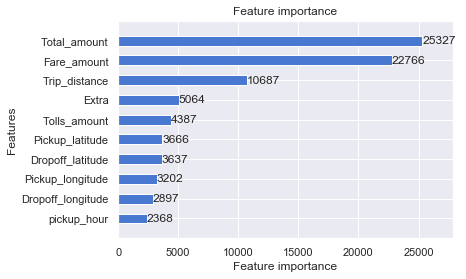

In [52]:
print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=10, height = 0.5)
plt.show()

### Our LightGBM model gave us a RMSE score of 0.544
### Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
### This can be improved by tuning our hyperparameters (learning_rate, max_depth, max_bins, num_leaves etc..), performing some feature engineering to create a better set of predictor variables, ensembling/stacking our tree models.
### Linear regression and XGboost can be tuned properly to acheive lower RMSE but it involves more computational power.

## Question 5
Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.

### Option A:Distibutions
##### Build a derived variable representing the average speed over the course of a trip.

In [140]:
nyc_trip['travel_time'] = ((nyc_trip['Lpep_dropoff_datetime']-nyc_trip['lpep_pickup_datetime']).dt.seconds)/3600
nyc_trip['average_speed'] = (nyc_trip['Trip_distance']/nyc_trip['travel_time'])

In [141]:
## Remove all entries greater than 120 mph
nyc_trip = nyc_trip[nyc_trip['average_speed'] <120]
nyc_trip.shape

(1473776, 34)

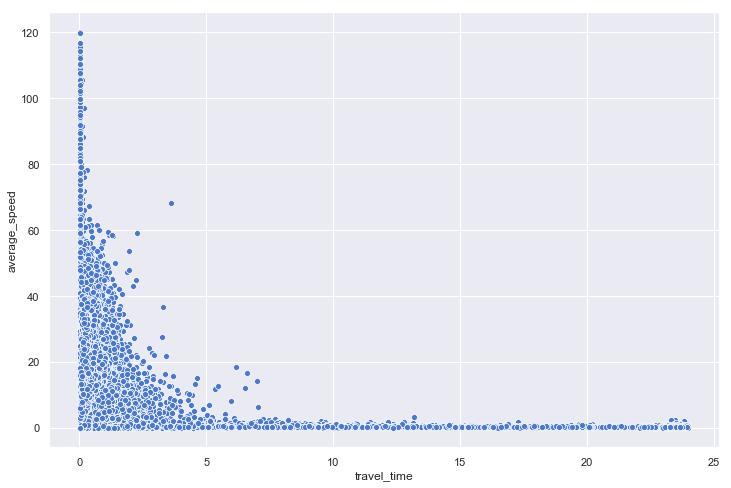

In [142]:
## Scatter plot for averagespeed and traveltime
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="travel_time", y="average_speed", data=nyc_trip)
plt.show()

##### Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?


In [143]:
nyc_trip.drop(['Ehail_fee','tip_percent'], axis=1, inplace=True)
nyc_trip['week'] = nyc_trip['Lpep_dropoff_datetime'].apply(lambda x: x.week)

In [144]:
week_1 = nyc_trip['average_speed'][nyc_trip['week']==36].values # reassign week=36 to week_1 df
week_2 = nyc_trip['average_speed'][nyc_trip['week']==37].values # reassign week=37 to week_2 df
week_3 = nyc_trip['average_speed'][nyc_trip['week']==38].values # reassign week=38 to week_3 df
week_4 = nyc_trip['average_speed'][nyc_trip['week']==39].values # reassign week=39 to week_4 df
week_5 = nyc_trip['average_speed'][nyc_trip['week']==40].values # reassign week=40 to week_5 df

In [145]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=1036.396642074436, pvalue=0.0)

#### Hypotheses test: The ANOVA test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we conclude that the differences between the groups are statistically significant which implies that the week of the month does seem to be related to the average speed. We further compute the mean, median and histogram for these groups to support our claims.

In [146]:
print(week_1.mean(),week_2.mean(),week_3.mean(),week_4.mean(),week_5.mean())

13.362511743873466 12.70683970737358 12.6947270598666 13.169535513173692 12.454646793713689


In [147]:
print(statistics.median(week_1),statistics.median(week_2),statistics.median(week_3),statistics.median(week_4),
      statistics.median(week_5))

12.122448979591837 11.612903225806452 11.632887189292543 12.02260955998509 11.416490486257928


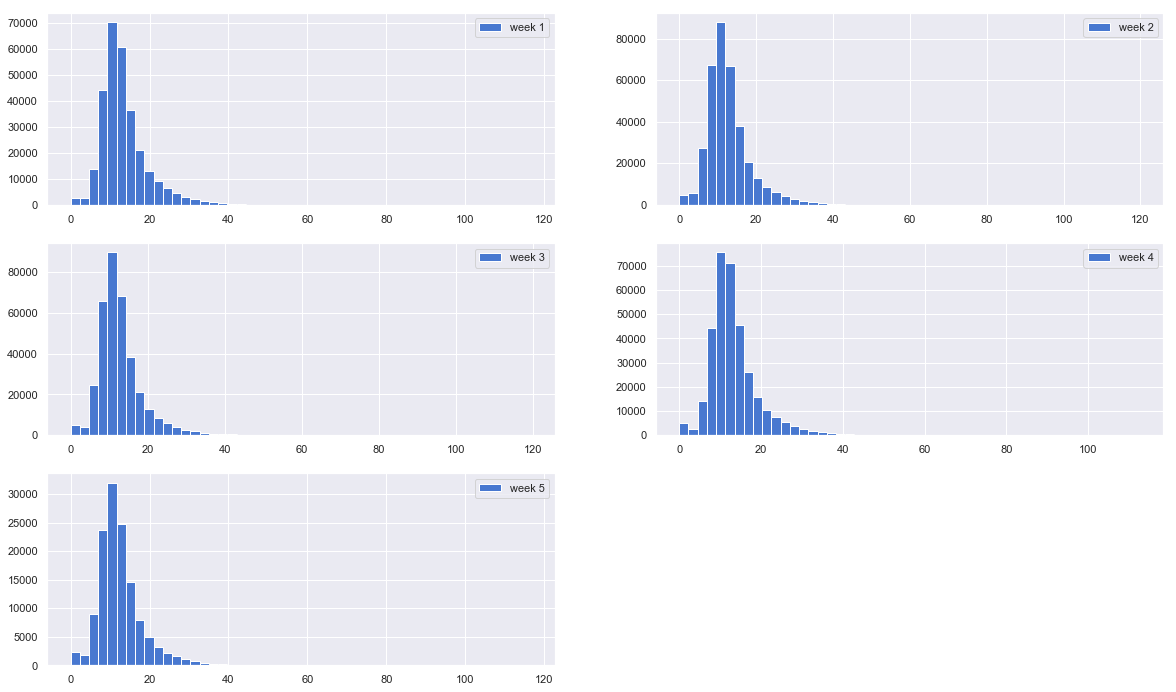

In [148]:
plt.rcParams["figure.figsize"] = [20,12]
plt.subplot(3,2,1)
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.subplot(3,2,2)
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.subplot(3,2,3)
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.subplot(3,2,4)
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.subplot(3,2,5)
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.legend()
plt.savefig('task5')
plt.show()

#### Can you build up a hypothesis of average trip speed as a function of time of day?

In [149]:
grouped = nyc_trip.groupby('pickup_hour') # group by the hour
samples = []
for name,group in grouped:
    samples.append(group['average_speed']) # append the avg speed data

In [150]:
sample = samples
stats.f_oneway(sample[0],sample[1],sample[2],sample[3], sample[4],sample[5],sample[6],sample[7],sample[8],sample[9],
              sample[10],sample[11],sample[12],sample[13],sample[14],sample[15],sample[16],sample[17],sample[18],
               sample[19],
              sample[20],sample[21],sample[22],sample[23])

F_onewayResult(statistic=4998.915898282646, pvalue=0.0)

#### Hypotheses test: The ANOVA test for sets partitioned as per the hour of the journey also gives a high f-value and p-value of 0, implying that there are statistifically significant differences in the data sets considered.

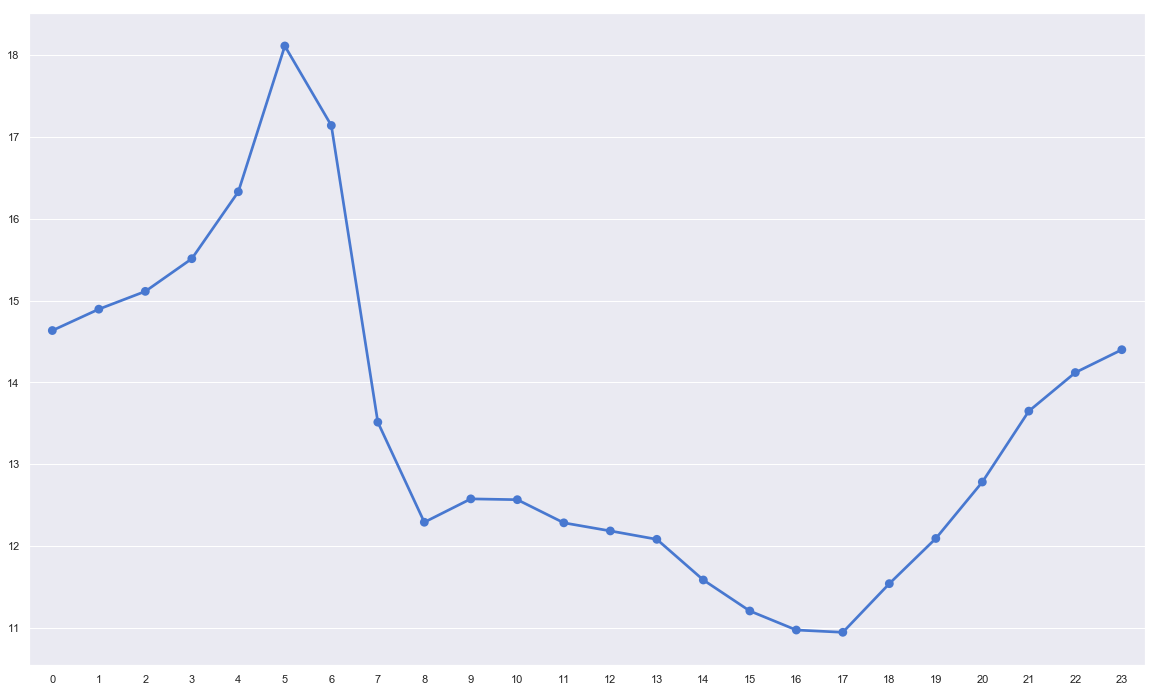

In [151]:
grouped = nyc_trip.groupby(['pickup_hour'])['average_speed'].aggregate(np.mean).reset_index()
sns.pointplot(grouped.pickup_hour.values, grouped.average_speed.values, alpha=0.8)